# FLIGHT PRICE PREDICTION

## Problem Statement:
Airlines implement dynamic pricing for their tickets, and base their pricing decisions on demand estimation models. The reason for such a complicated system is that each flight only has a set number of seats to sell, so airlines have to regulate demand. In the case where demand is expected to exceed capacity, the airline may increase prices, to decrease the rate at which seats fill. On the other hand, a seat that goes unsold represents a loss of revenue, and selling that seat for any price above the service cost for a single passenger would have been a more preferable scenario.

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on -

1. Time of purchase patterns (making sure last-minute purchases are expensive)

2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases)

So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights. This project contains three phase-

## 1. Data Collection:
I have done web scraping to collect the data of flight ticket prices from the well known website https://www.yatra.com/ where I found more features of flights compared to other websites and I fetch data for different locations. As per the requirement we need to build the model to predict the prices of different flight tickets.

## 2. Data Analysis:
After cleaning the data, we have to do some analysis on the data.

Do airfares change frequently? Do they move in small increments or in large jumps?
Do they tend to go up or down over time?
What is the best time to buy so that the consumer can save the most by taking the least risk?
Does price increase as we get near to departure date?
Is Indigo cheaper than Jet Airways?
Are morning flights expensive?
## 3. Model Building:
After collecting the data, we need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the bestmodel.

Follow the complete life cycle of data science. Include all the steps like

1. Data Cleaning

2. Exploratory Data Analysis

3. Data Pre-processing

4. Model Building

5. Model Evaluation

6. Selecting the best model

## Importing necessary libraries/dependencies.

In [1]:
# Preprocessing
import numpy as np
import pandas as pd
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
from scipy.stats import zscore   # To remove outliers
# Evaluation Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics
# ML Algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Importing collected dataset

In [2]:
# Reading excel file
df = pd.read_excel("Flight_Prices.xlsx")
pd.set_option("display.max_rows",None)
df

Unnamed: 0       Airline Departure_time Time_of_arrival Duration  \
0              0        IndiGo          11:55           13:55   2h 00m   
1              1        IndiGo          10:45           12:50   2h 05m   
2              2        IndiGo          17:00           19:05   2h 05m   
3              3        IndiGo          23:35           01:40   2h 05m   
4              4        IndiGo          02:00           04:10   2h 10m   
5              5      Go First          06:00           08:10   2h 10m   
6              6      Go First          14:00           16:10   2h 10m   
7              7        IndiGo          14:10           16:20   2h 10m   
8              8        IndiGo          15:25           17:35   2h 10m   
9              9        IndiGo          16:15           18:25   2h 10m   
10            10        IndiGo          19:45           21:55   2h 10m   
11            11      Go First          15:45           18:00   2h 15m   
12            12        IndiGo          18:10           20:25   2h 15m   
13            13      Go First          18:40           20:55   2h 15m   
14            14      SpiceJet          18:55           21:10   2h 15m   
15            15        IndiGo          21:45           00:15   2h 30m   
16            16      Go First          20:05           01:55   5h 50m   
17            17      Go First          09:15           15:55   6h 40m   
18            18      SpiceJet          18:25           01:20   6h 55m   
19            19      Go First          13:45           21:00   7h 15m   
20            20      SpiceJet          19:30           12:20  16h 50m   
21            21      SpiceJet          18:25           12:20  17h 55m   
22            22       Vistara          14:20           16:30   2h 10m   
23            23     Air India          20:00           22:10   2h 10m   
24            24     Air India          14:00           16:15   2h 15m   
25            25       Vistara          11:40           14:00   2h 20m   
26            26     Air India          21:15           23:35   2h 20m   
27            27     Air India          15:05           18:10   3h 05m   
28            28     Air India          18:00           21:45   3h 45m   
29            29        IndiGo          09:35           12:00   2h 25m   
30            30      Air Asia          13:00           14:50   1h 50m   
31            31      Air Asia          04:25           06:35   2h 10m   
32            32        IndiGo          06:30           08:35   2h 05m   
33            33        IndiGo          07:20           09:25   2h 05m   
34            34      SpiceJet          07:05           09:20   2h 15m   
35            35      SpiceJet          13:00           18:50   5h 50m   
36            36      SpiceJet          18:25           08:55  14h 30m   
37            37      SpiceJet          20:00           10:30  14h 30m   
38            38      SpiceJet          06:10           21:45  15h 35m   
39            39       Vistara          21:55           23:55   2h 00m   
40            40       Vistara          12:50           15:00   2h 10m   
41            41       Vistara          15:30           17:40   2h 10m   
42            42       Vistara          20:40           22:50   2h 10m   
43            43       Vistara          16:45           19:05   2h 20m   
44            44      SpiceJet          06:20           08:45   2h 25m   
45            45      Go First          20:45           22:55   2h 10m   
46            46      Go First          10:55           13:10   2h 15m   
47            47        IndiGo          14:45           00:05   9h 20m   
48            48       Vistara          19:50           22:00   2h 10m   
49            49       Vistara          18:55           21:15   2h 20m   
50            50      Air Asia          12:50           19:15   6h 25m   
51            51      Air Asia          10:40           19:15   8h 35m   
52            52      Air Asia          12:50           23:45  10h 55m   
53        

Here I am importing the colleced dataset which is in excel format and storing it into dataframe (df) for further usage. Here we can observe first 5 and last 5 rows of the dataset. There are 3664 rows and 10 columns in the dataframe. The dataset contains both numerical and categorical data. There are both dependent and independent variables present in the dataframe. We have our target variable "Price" which stores the price of the flight tickets and it is continuous in nature which makes this problem to be a "Regression Problem".

## Data Description (Attribute Information)

|Serial No||Variable||Definition|||
|------------||----------||--------||----------|
|1||Airline||The Name of airline|||
|2||Departure_time||The time when the journey starts from the source|||
|3||Time_of_arrival||Time of arrival at the destination|||
|4||Duration||Total duration taken by the flight to reach the destination from the source|||
|5||Source||The source from which the service begins|||
|6||Destination||The destination where the service ends|||
|7||Meal_availability||Availability of meals in the flight|||
|8||Number_of_stops||Total stops between the source and destination|||
|9||Price||The price of the flight ticket|||

## Data Cleaning

In [3]:
# Dropping unwanted column
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()   # Displaying the dataframe

Airline Departure_time Time_of_arrival Duration     Source Destination  \
0  IndiGo          11:55           13:55   2h 00m  New Delhi      Mumbai   
1  IndiGo          10:45           12:50   2h 05m  New Delhi      Mumbai   
2  IndiGo          17:00           19:05   2h 05m  New Delhi      Mumbai   
3  IndiGo          23:35           01:40   2h 05m  New Delhi      Mumbai   
4  IndiGo          02:00           04:10   2h 10m  New Delhi      Mumbai   

       Meal_availability Number_of_stops  Price  
0  Emissions: 142 Kg CO2        Non Stop  7,319  
1  Emissions: 142 Kg CO2        Non Stop  7,319  
2              eCash 250        Non Stop  7,319  
3              eCash 250        Non Stop  7,319  
4  Emissions: 142 Kg CO2        Non Stop  7,319

Removed unwanted column "Unnamed: 0" from the dataset since it was only storing the index data and was not a worthy feature column for prediction. We can observe first 5 rows of the dataset.

In [4]:
# Checking the dimensions of the dataset
print("There are {} rows and {} columns in our dataframe".format(df.shape[0], df.shape[1]))

There are 3664 rows and 9 columns in our dataframe


The dataset contains 3664 rows and 9 columns. Out of 9 columns 8 are independent variables and remaining one is our target variable "Price" which is dependent variable.

In [5]:
# Checking the column names in the dataset
print("Columns present in our dataset:\n",df.columns)

Columns present in our dataset:
 Index(['Airline', 'Departure_time', 'Time_of_arrival', 'Duration', 'Source',
       'Destination', 'Meal_availability', 'Number_of_stops', 'Price'],
      dtype='object')


These are the columns present in our dataset.

In [6]:
# Checking number of unique values in each column of dataset
df.nunique().to_frame("No of Unique Values")

No of Unique Values
Airline                              7
Departure_time                     258
Time_of_arrival                    259
Duration                           360
Source                               8
Destination                          9
Meal_availability                   11
Number_of_stops                      4
Price                             1292

Above are the number of unique values present in each of the columns present in the dataset.

In [7]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            3664 non-null   object
 1   Departure_time     3664 non-null   object
 2   Time_of_arrival    3664 non-null   object
 3   Duration           3664 non-null   object
 4   Source             3664 non-null   object
 5   Destination        3664 non-null   object
 6   Meal_availability  3664 non-null   object
 7   Number_of_stops    3664 non-null   object
 8   Price              3664 non-null   object
dtypes: object(9)
memory usage: 257.8+ KB


- This info() method gives the information about the dataset which includes indexing type, column type, no-null values and memory usage.
- The dataset contains object type data. We will encode the object datatypes using appropriate encoding techniques before building machine learning models.
- Since counts of all the columns are same, which means there are no null values present in the dataset.


In [8]:
# Checking null values in the dataset
df.isnull().sum()

Airline              0
Departure_time       0
Time_of_arrival      0
Duration             0
Source               0
Destination          0
Meal_availability    0
Number_of_stops      0
Price                0
dtype: int64

As we can see there are no missing values in any of the columns.

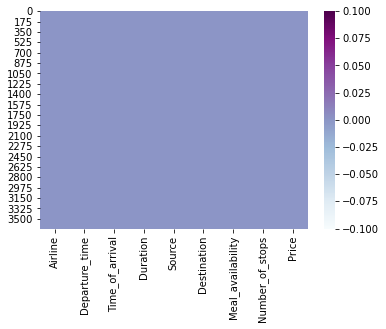

In [9]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull(),cmap="BuPu")
plt.show()

Here we can clearly observe there are no missing values.

## Value count function

Let's check the list of value counts in each columns to find if there are any unexpected or corrupted entries present in the dataset

In [10]:
# Checking the value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('*'*80)

IndiGo          1349
Vistara          752
Air India        608
Go First         404
SpiceJet         327
Air Asia         208
Alliance Air      16
Name: Airline, dtype: int64
********************************************************************************
14:00    74
06:00    68
07:10    60
06:40    54
06:55    45
13:00    44
14:20    42
05:55    41
14:40    41
21:55    39
07:00    37
13:25    37
17:35    37
09:00    36
21:40    35
18:10    35
18:00    35
18:25    34
13:20    32
06:45    31
10:25    30
10:05    30
19:00    30
09:55    30
23:10    30
10:15    29
06:10    29
14:25    29
20:30    29
07:05    29
06:30    29
05:45    29
17:15    27
19:55    27
09:45    27
09:25    27
21:10    27
20:20    27
15:45    26
06:50    25
21:35    25
07:45    25
17:00    25
15:15    24
22:15    24
12:55    24
12:05    24
08:30    24
16:20    24
20:15    23
13:30    23
17:40    23
17:45    22
14:15    22
09:30    22
05:20    22
10:45    22
08:35    22
18:30    21
19:10    20
16:55    19
08:55    19


These are the value counts of the columns present in the dataset.

## Feature Engineering

The columns Time_of_arrival and Departure_Time showing object data type which means python is not able to understand the type of data in this column due to some string values or categorical signs like ":" which we can observe in the value count function. Therefore, we have to convert this datatype into timestamp (datetime) to use them properly for prediction.

In [11]:
# Converting columns from object type to Datetime Type
df["Departure_time"] = pd.to_datetime(df["Departure_time"])
df["Time_of_arrival"] = pd.to_datetime(df["Time_of_arrival"])

In [12]:
#Checking the data types of all columns again
df.dtypes

Airline                      object
Departure_time       datetime64[ns]
Time_of_arrival      datetime64[ns]
Duration                     object
Source                       object
Destination                  object
Meal_availability            object
Number_of_stops              object
Price                        object
dtype: object

## Duration

The column Duration has values in terms of minutes and hours. Duration means the time taken by the plane to reach the destination and it is the difference between the arrival time and Departure time. Let's extract proper duration time in terms of float data type from Time_of_arrival and Departure_time columns.

In [13]:
#Extracting Duration column using Time_of_arrival and Departure_Time
Difference = (df["Time_of_arrival"]-df["Departure_time"])
Diff_list = list()
for i in range(len(Difference)):
    duration = Difference.iloc[i].seconds/3600  # Converting difference into seconds and Dividing it by 3600 (1hr=3600seconds)
    Diff_list.append(duration)
df["Duration"] = Diff_list

## Departure_time
Let's extract values from Departure_time. Departure time means when a flight leaves the airport and this column contains hours and minutes so we will extract hours and minutes from Departure_time.

In [14]:
# Departure time means the time when the journey starts from the source.

# Extracting Hours from Departure_time column
df["Departure_Hour"] = pd.to_datetime(df["Departure_time"]).dt.hour

# Extracting Minutes from Dep_Time column
df["Departure_Min"] = pd.to_datetime(df["Departure_time"]).dt.minute

Now we have extracted hour and minute from Departure_time column. Let's drop Departure_time column as it is of no use now.

In [15]:
# Dropping Departure_time column
df.drop("Departure_time",axis=1,inplace=True)

## Time_of_arrival

Similarly we can extract hours and minutes from Time_of_arrival column and dropping Time_of_arrival column.

In [16]:
# Arrival time is time of arrival at the destination.

# Extracting hour from Time_of_arrival column
df["Arrival_Hour"] = pd.to_datetime(df["Time_of_arrival"]).dt.hour

# Extracting Minutes from Arrival_Time column
df["Arrival_Min"] = pd.to_datetime(df["Time_of_arrival"]).dt.minute

# Dropping Arrival_Time column
df.drop("Time_of_arrival",axis=1,inplace=True)

Now we have extracted required data from the columns.

## Price
The target column should be in continuous numeric data type but it is appearing as object data type due to some categorical sign ",". Let's replace this sign by empty space and convert the type into float.

In [17]:
# Let's replace "," sign by empty space
df['Price'] = df['Price'].str.replace(',','')
# Let's convert data type of Price column to float
df['Price'] = df['Price'].astype('float')

## Meal_availability
From the value count function of Meal_availability we can observe "eCash 250","Emissions: 142 Kg CO2","Emissions: 109 Kg CO2","Emissions: 185 Kg CO2","Emissions: 112 Kg CO2","Emissions: 303 Kg CO2","Emissions: 140 Kg CO2","Emissions: 191 Kg CO2" and "Emissions: 252 Kg CO2" entry which does not belongs to meals so we can replace it as "None". Also, the other two entries "No meal fare" and "Free meal" belongs to same category that is they give same meaning so we can group them as well. We can also drop this column, but there are only few features in the dataset so, trying to retain the columns for prediction.

In [18]:
# Replacing "eCash250" by "None"
df['Meal_availability'] = df['Meal_availability'].replace('eCash 250','None')
# Replacing "Emissions:142 Kg CO2" by "None"
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 142 Kg CO2','None')
# Replacing "Emissions:109 Kg CO2" by "None"
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 109 Kg CO2','None')
# Replacing "Emissions:185 Kg CO2" by "None"
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 185 Kg CO2','None')
# Replacing "Emissions:112 Kg CO2" by "None"
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 112 Kg CO2','None')
# Replacing "Emissions:303 Kg CO2" by "None"
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 303 Kg CO2','None')
# Replacing "Emissions:140 Kg CO2" by "None"
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 140 Kg CO2','None')
# Replacing "Emissions:191 Kg CO2" by "None"
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 191 Kg CO2','None')
# Replacing "Emissions:252 Kg CO2" by "None"
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 252 Kg CO2','None')

# Grouping the entries with same meaning
df['Meal_availability'] = df['Meal_availability'].replace('No Meal Fare','Free Meal')

## Number_of_stops
From the value count function of Number_of_stops we can observe the categorical values, let's replace them with numeric data.

In [19]:
# Replacing categorical values with numeric data
df.Number_of_stops.replace({"Non Stop": 0,"1 Stop": 1,"2 Stop(s)": 2,"3 Stop(s)": 3,"4 Stop(s)": 4},inplace = True)

Now we have successfully cleaned our data, let's have a look at dataframe.

In [20]:
# Checking dataset again
df

Airline   Duration     Source Destination Meal_availability  \
0           IndiGo   2.000000  New Delhi      Mumbai              None   
1           IndiGo   2.083333  New Delhi      Mumbai              None   
2           IndiGo   2.083333  New Delhi      Mumbai              None   
3           IndiGo   2.083333  New Delhi      Mumbai              None   
4           IndiGo   2.166667  New Delhi      Mumbai              None   
5         Go First   2.166667  New Delhi      Mumbai              None   
6         Go First   2.166667  New Delhi      Mumbai              None   
7           IndiGo   2.166667  New Delhi      Mumbai              None   
8           IndiGo   2.166667  New Delhi      Mumbai              None   
9           IndiGo   2.166667  New Delhi      Mumbai              None   
10          IndiGo   2.166667  New Delhi      Mumbai              None   
11        Go First   2.250000  New Delhi      Mumbai              None   
12          IndiGo   2.250000  New Delhi      Mumbai              None   
13        Go First   2.250000  New Delhi      Mumbai              None   
14        SpiceJet   2.250000  New Delhi      Mumbai              None   
15          IndiGo   2.500000  New Delhi      Mumbai              None   
16        Go First   5.833333  New Delhi      Mumbai              None   
17        Go First   6.666667  New Delhi      Mumbai              None   
18        SpiceJet   6.916667  New Delhi      Mumbai              None   
19        Go First   7.250000  New Delhi      Mumbai              None   
20        SpiceJet  16.833333  New Delhi      Mumbai              None   
21        SpiceJet  17.916667  New Delhi      Mumbai              None   
22         Vistara   2.166667  New Delhi      Mumbai         Free Meal   
23       Air India   2.166667  New Delhi      Mumbai         Free Meal   
24       Air India   2.250000  New Delhi      Mumbai         Free Meal   
25         Vistara   2.333333  New Delhi      Mumbai         Free Meal   
26       Air India   2.333333  New Delhi      Mumbai         Free Meal   
27       Air India   3.083333  New Delhi      Mumbai         Free Meal   
28       Air India   3.750000  New Delhi      Mumbai         Free Meal   
29          IndiGo   2.416667  New Delhi      Mumbai              None   
30        Air Asia   1.833333  New Delhi      Mumbai              None   
31        Air Asia   2.166667  New Delhi      Mumbai              None   
32          IndiGo   2.083333  New Delhi      Mumbai              None   
33          IndiGo   2.083333  New Delhi      Mumbai              None   
34        SpiceJet   2.250000  New Delhi      Mumbai              None   
35        SpiceJet   5.833333  New Delhi      Mumbai              None   
36        SpiceJet  14.500000  New Delhi      Mumbai              None   
37        SpiceJet  14.500000  New Delhi      Mumbai              None   
38        SpiceJet  15.583333  New Delhi      Mumbai              None   
39         Vistara   2.000000  New Delhi      Mumbai         Free Meal   
40         Vistara   2.166667  New Delhi      Mumbai         Free Meal   
41         Vistara   2.166667  New Delhi      Mumbai         Free Meal   
42         Vistara   2.166667  New Delhi      Mumbai         Free Meal   
43         Vistara   2.333333  New Delhi      Mumbai         Free Meal   
44        SpiceJet   2.416667  New Delhi      Mumbai              None   
45        Go First   2.166667  New Delhi      Mumbai              None   
46        Go First   2.250000  New Delhi      Mumbai              None   
47          IndiGo   9.333333  New Delhi      Mumbai              None   
48         Vistara   2.166667  New Delhi      Mumbai         Free Meal   
49         Vistara   2.333333  New Delhi      Mumbai         Free Meal   
50        Air Asia   6.416667  New Delhi      Mumbai              None   
51        Air Asia   8.583333  New Delhi      Mumbai              None   
52        Air Asia  10.916667  New Delhi      Mumbai              None   
53        Air A

In [21]:
# Checking shape of data after cleaning 
df.shape

(3664, 11)

Now the dataset contains 3664 rows and 11 columns.

In [22]:
# Let's check the data types of the columns
df.dtypes

Airline               object
Duration             float64
Source                object
Destination           object
Meal_availability     object
Number_of_stops        int64
Price                float64
Departure_Hour         int64
Departure_Min          int64
Arrival_Hour           int64
Arrival_Min            int64
dtype: object

The dataframe has 3 types of data that is object, integer and float data types. We will encode the object data types before building the ML model.

In [23]:
# Checking the uniqueness of target column
df["Price"].unique()

array([ 7319.,  7320.,  7529., ..., 21281., 23224., 31414.])

These are the unique values present in the target column.

In [24]:
# Checking whether the target contains any space
df.loc[df['Price']==" "]

Empty DataFrame
Columns: [Airline, Duration, Source, Destination, Meal_availability, Number_of_stops, Price, Departure_Hour, Departure_Min, Arrival_Hour, Arrival_Min]
Index: []

There is no any empty space in any of the columns.

## Description of Dataset

In [25]:
# Statistical summary of dataset
df.describe()

Duration  Number_of_stops         Price  Departure_Hour  \
count  3664.000000      3664.000000   3664.000000     3664.000000   
mean      8.363059         0.912664  11964.177129       12.694596   
std       5.839529         0.564210   4749.917108        5.664697   
min       0.000000         0.000000   3435.000000        0.000000   
25%       3.416667         1.000000   8165.250000        8.000000   
50%       7.250000         1.000000  11254.000000       13.000000   
75%      11.520833         1.000000  14868.000000       17.000000   
max      23.916667         3.000000  35758.000000       23.000000   

       Departure_Min  Arrival_Hour  Arrival_Min  
count    3664.000000   3664.000000  3664.000000  
mean       26.042576     14.299400    29.485535  
std        17.797181      6.419764    17.335910  
min         0.000000      0.000000     0.000000  
25%        10.000000      9.000000    15.000000  
50%        25.000000     15.000000    30.000000  
75%        40.000000     20.000000    45.000000  
max        55.000000     23.000000    55.000000

This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.

From the above description we can observe the following things

- The counts of every column is same which means there are no missing values present in the dataset.
- The mean value is greater than the median(50%) in the columns Duration, Number_of_stops, and Price so we can say these columns are skewed to right.
- The median(50%) is bit greater than mean in Departure_Hour, Departure_Min, Arrival_Hour, Arrival_Hour and Arrival_Min which means these columns are skewed to left.
- From the description we can say the minimum price of the flight ticket is Rs.3435.00 and maximum price is Rs.35758.00 also the mean is 11964.177129.
- In summarizing the data we can observe that there is huge difference in maximum and 75% percentile in the columns Price, Duration, etc that means huge outliers present in those columns. These differences can also be seen in many other columns. So we need to remove outliers and skewness to get better model and prediction.

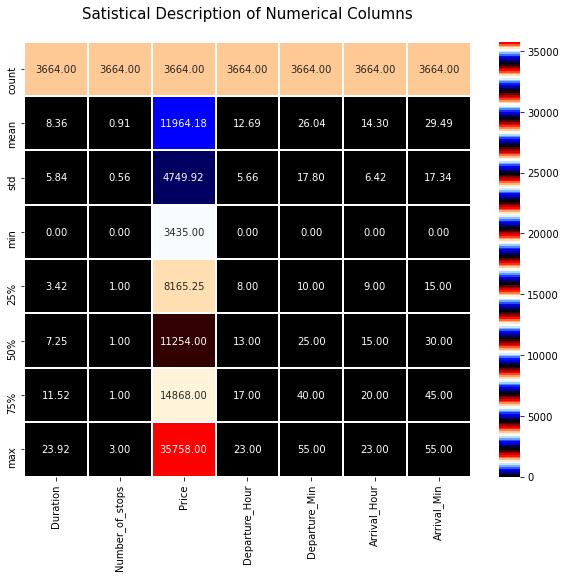

In [26]:
# Visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (10,8))
sns.heatmap(round(df.describe()[0:],2), linewidth = 1, annot= True, fmt = ".2f", cmap="flag_r")
plt.title("Satistical Description of Numerical Columns\n",fontsize=15)

plt.show()

From the heat map we can observe the statistical summary of the numerical features present in the dataset.

## Separating numerical and categorical columns

In [27]:
# Separating numerical and categorcal columns in the dataset

# Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns present in the dataset are:\n",categorical_col)

# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("\nNumerical columns present in the dataset are:\n",numerical_col)

Categorical columns present in the dataset are:
 ['Airline', 'Source', 'Destination', 'Meal_availability']

Numerical columns present in the dataset are:
 ['Duration', 'Number_of_stops', 'Price', 'Departure_Hour', 'Departure_Min', 'Arrival_Hour', 'Arrival_Min']


These are the object data type and numerical type columns present in the dataset. "Number_of_stops" is categorical data since it is in integer type so its appearing as numeric data.

Now it's time to visualize the data.

## Exploratory Data Analysis (EDA)
## Data Visualization
### Univariate Analysis
### Plotting categorical Variables

IndiGo          1349
Vistara          752
Air India        608
Go First         404
SpiceJet         327
Air Asia         208
Alliance Air      16
Name: Airline, dtype: int64 

1    2587
0     718
2     320
3      39
Name: Number_of_stops, dtype: int64


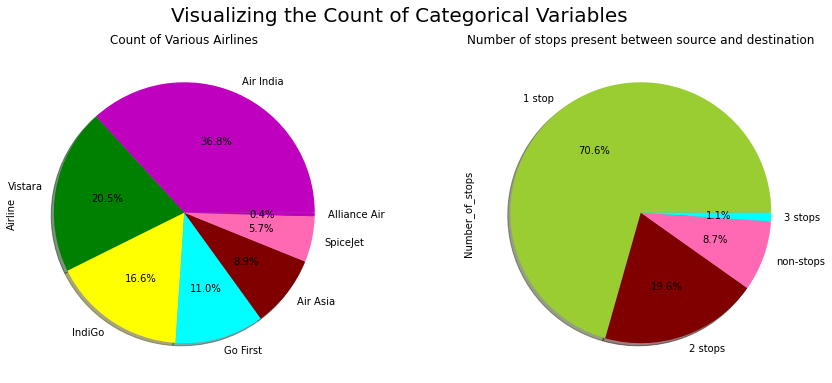

In [28]:
# Visualizing the count of categorical variables
plt.figure(figsize=(15,6))
plt.suptitle('Visualizing the Count of Categorical Variables',fontsize=20)

# Visualizing the count of Airlines
plt.subplot(1,2,1)
print(df["Airline"].value_counts(),"\n")
plt.title('Count of Various Airlines')
labels = ['Air India', 'Vistara', 'IndiGo', 'Go First', 'Air Asia', 'SpiceJet','Alliance Air']
colors = ["m", "green","yellow", "cyan", "maroon", "hotpink"]
df['Airline'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,labels=labels,fontsize=10,colors=colors)

# Visualizing the count of Number_of_stops
plt.subplot(1,2,2)
print(df['Number_of_stops'].value_counts())
plt.title('Number of stops present between source and destination')
labels = ['1 stop', '2 stops', 'non-stops', '3 stops', '4 stops']
colors = ["yellowgreen","maroon","hotpink","cyan","red"]
df['Number_of_stops'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,labels=labels,fontsize=10,colors=colors)
plt.show()

## Observations:
- Airline: From the pie plot we can infer that there are more number of flights of "Air India", "Vistara" and "Indigo" compared to others. Also, the count of Alliance Air flights are very less.
- Number_of_stops: From the above pie plot we can infer that 70.6% of the flights have only 1 stop during the journey and some of the flights (19.6%) have 2 stops where only few flights have 3 and 4 stops.

None         2284
Free Meal    1380
Name: Meal_availability, dtype: int64


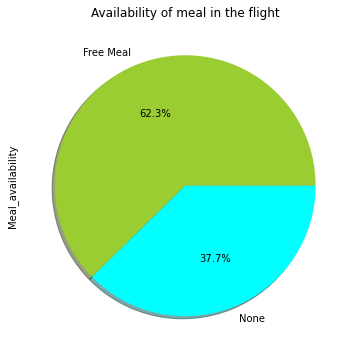

In [29]:
# Visualizing the availability of meal in the flight
plt.figure(figsize=(6,6))
print(df["Meal_availability"].value_counts())
plt.title('Availability of meal in the flight')
labels = ['Free Meal', 'None']
colors = ["yellowgreen","cyan"]
df['Meal_availability'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,labels=labels,fontsize=10,colors=colors)
plt.show()

## Observations:
- Meal_availability: Most of the flights providing free meals and few flights are not providing any meals.

Mumbai       658
Kolkata      554
Hyderabad    515
New Delhi    500
Bangalore    446
Goa          388
Chennai      358
Jaipur       245
Name: Source, dtype: int64 

Bangalore    600
New Delhi    590
Mumbai       564
Goa          357
Hyderabad    342
Chennai      333
Kolkata      317
Jaipur       307
Lucknow      254
Name: Destination, dtype: int64


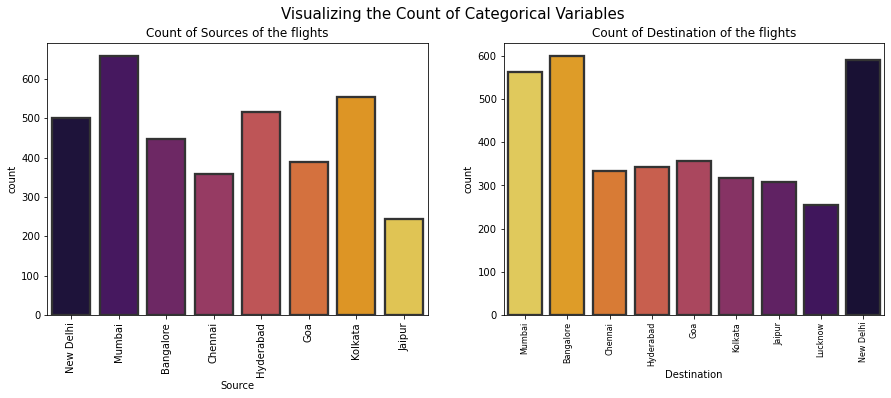

In [30]:
# Visualizing the count of categorical variables
plt.figure(figsize=(15,5))
plt.suptitle('Visualizing the Count of Categorical Variables',fontsize=15)

# Visualizing the count of Sources of the flights
plt.subplot(1,2,1)
print(df['Source'].value_counts(),"\n")
plt.title('Count of Sources of the flights')
sns.countplot('Source', data=df, palette="inferno",linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)

# Visualizing the count of Destination of the flights
plt.subplot(1,2,2)
print(df['Destination'].value_counts())
plt.title('Count of Destination of the flights')
sns.countplot('Destination', data=df, palette="inferno_r",linewidth=2.3, edgecolor=".2")
plt.xticks(fontsize='8')
plt.xticks(rotation=90)
plt.show()

## Observations:
- Source: From the count plot we can observe more number of flights are from Mumbai, New Delhi, Hyderabad, Kolkata and Bangalore. Only few flights are from Hyderabad.
- Destination: More number of flights are heading towards Mumbai, New Delhi and Bangalore. Only few flights are travelling to Lucknow.

## Distribution of skewness
## Plotting Numerical Variables

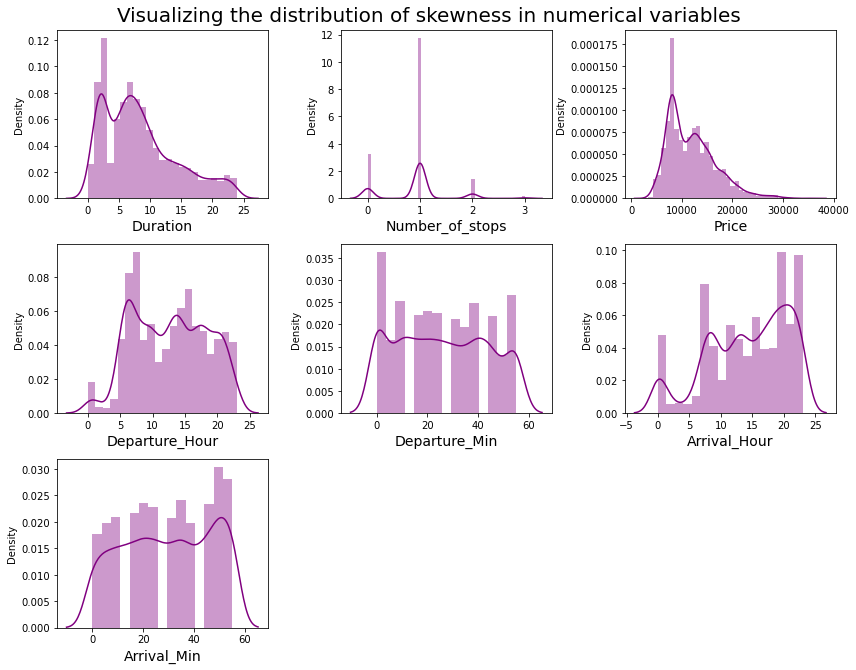

In [31]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the distribution of skewness in numerical variables",fontsize=20)
plotnumber=1
for column in numerical_col:
    if plotnumber<=7:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column], color="purple")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

## Observations:
Above plot shows how the data has been distributed in each of the columns.

- From the distribution plot we can observe the columns are somewhat distributed normally as they have no proper bell shape curve.
- The columns like "Duration", "Number_of_stops" and "Price" are skewed to right as the mean value in these columns are much greater than the median(50%).
- Also the data in the column Arrival_Hour skewed to left since the mean values is less than the median.
- Since there is presence of skewness in the data, we need to remove skewness in the numerical columns to overcome with any kind of data biasness.

## Bivariate Analysis
## Visualizing Categorical Variables vs Target Variable Price

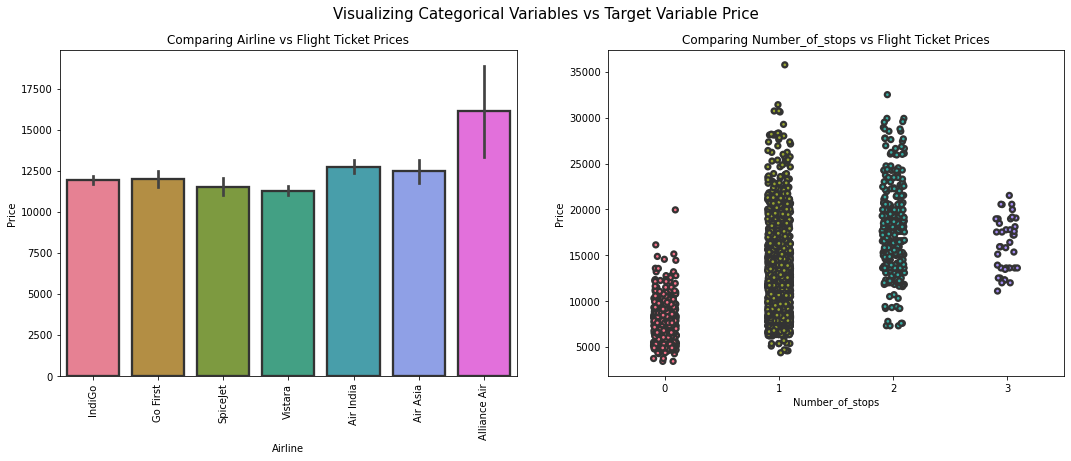

In [32]:
plt.figure(figsize = (18,6))
plt.suptitle("Visualizing Categorical Variables vs Target Variable Price",fontsize=15)

# Checking which Airline is expensive based on Price of tickets
plt.subplot(1,2,1)
plt.title("Comparing Airline vs Flight Ticket Prices")
sns.barplot(x= df['Airline'],y= df['Price'],palette = "husl",linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)

# Checking flights which have meals availability are expensive or not?
plt.subplot(1,2,2)
plt.title("Comparing Number_of_stops vs Flight Ticket Prices")
sns.stripplot(x = df['Number_of_stops'],y= df['Price'],palette = "husl",linewidth=2.3, edgecolor=".2")
plt.show()

## Observations:
- Airline vs Price: From the bar plot we can notice "Alliance Air" airlines have highest ticket price compared to other airlines.
- Number_of_stops vs Price: From the strip plot we can notice the flights which have 1 and 2 stops between source and destination have highest ticket prices compared to others. The airlines which have 0 stops during the journey have very less ticket price.

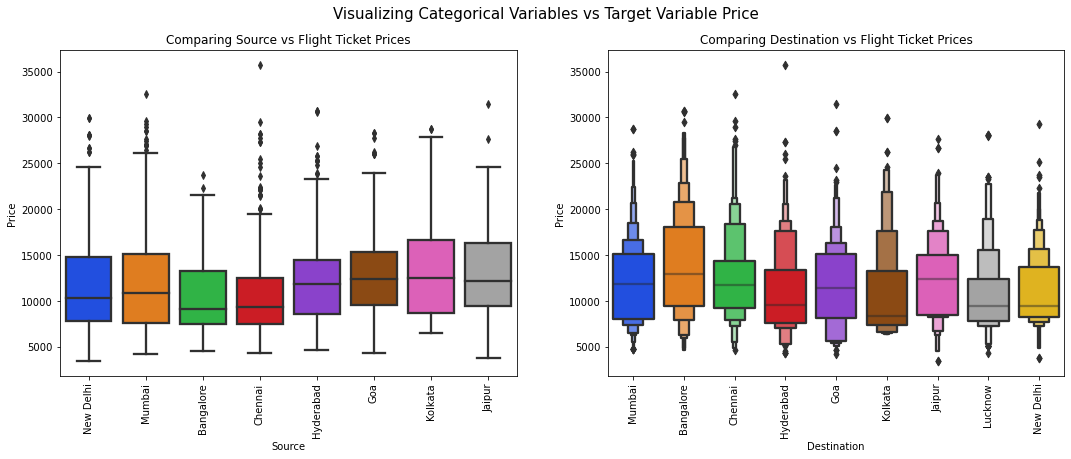

In [33]:
plt.figure(figsize = (18,6))
plt.suptitle("Visualizing Categorical Variables vs Target Variable Price\n",fontsize=15)

# Checking which source has highest ticket price
plt.subplot(1,2,1)
plt.title("Comparing Source vs Flight Ticket Prices")
sns.boxplot(x= df['Source'],y= df['Price'],palette = "bright",linewidth=2.3)
plt.xticks(rotation = 90)

# Checking how prices changes in each destination 
plt.subplot(1,2,2)
plt.title("Comparing Destination vs Flight Ticket Prices")
sns.boxenplot(x = df['Destination'],y= df['Price'],palette = "bright",linewidth=2.3)
plt.xticks(rotation = 90)
plt.show()

## Observations:
- Source vs Price: From the box plot we can observe the flights from Chennai are having somewhat higher prices compared to other sources.
- Destination vs Price: From the boxen plot we can notice that the flights travelling to Goa and New Delhi have higher flight ticket prices.

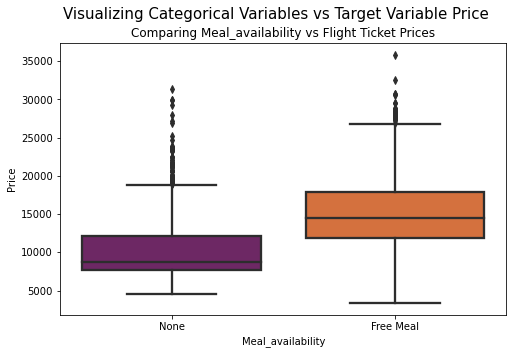

In [34]:
plt.figure(figsize = (8,5))
plt.suptitle("Visualizing Categorical Variables vs Target Variable Price\n",fontsize=15)
plt.title("Comparing Meal_availability vs Flight Ticket Prices")
sns.boxplot(x= df['Meal_availability'],y= df['Price'],palette = "inferno",linewidth=2.3)
plt.show()

## Observations:
- Meal_availability vs Price: The boxplot shows the flights having Free meal facility have high ticket prices.

## Visualizing Numerical Variables vs Target Variable Price

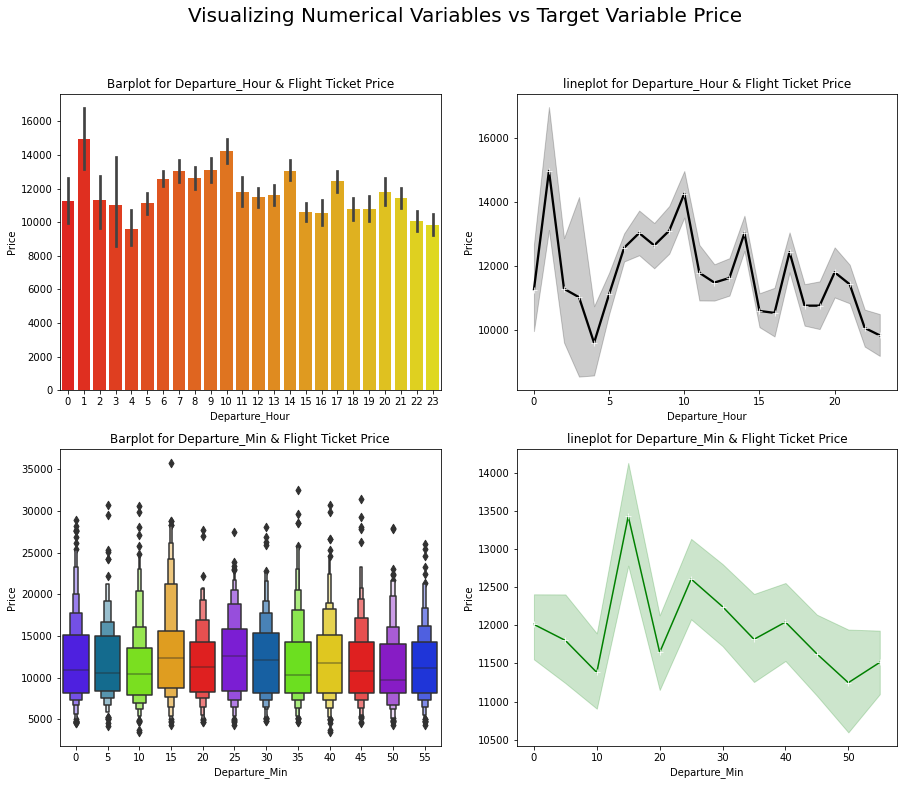

In [35]:
plt.figure(figsize = (15,12))
plt.suptitle("Visualizing Numerical Variables vs Target Variable Price",fontsize=20)

plt.subplot(2,2,1)
plt.title("Barplot for Departure_Hour & Flight Ticket Price")
sns.barplot(x= df['Departure_Hour'],y= df['Price'],palette = "autumn",linewidth=2.3)

plt.subplot(2,2,2)
plt.title("lineplot for Departure_Hour & Flight Ticket Price")
sns.lineplot(x = df['Departure_Hour'],y= df['Price'],marker="+",color='k',linewidth=2.3)

plt.subplot(2,2,3)
plt.title("Barplot for Departure_Min & Flight Ticket Price")
sns.boxenplot(x='Departure_Min',y='Price',data=df,palette = "prism",color='k')

plt.subplot(2,2,4)
plt.title("lineplot for Departure_Min & Flight Ticket Price")
sns.lineplot(x='Departure_Min',y='Price',data=df,marker="+",color='g')

plt.show()

## Observations:
- Departure_Hour vs Price: From the bar plot and line plot we can see that there are some flights departing in the early morning 1 AM having most expensive ticket prices compared to late morning flights. We can also observe the flight ticket prices are higher during afternoon (may fluctuate) and it decreases in the evening.
- Departure_Min vs Price: The boxen plot and line plot gives there is no significant difference between price and departure min.

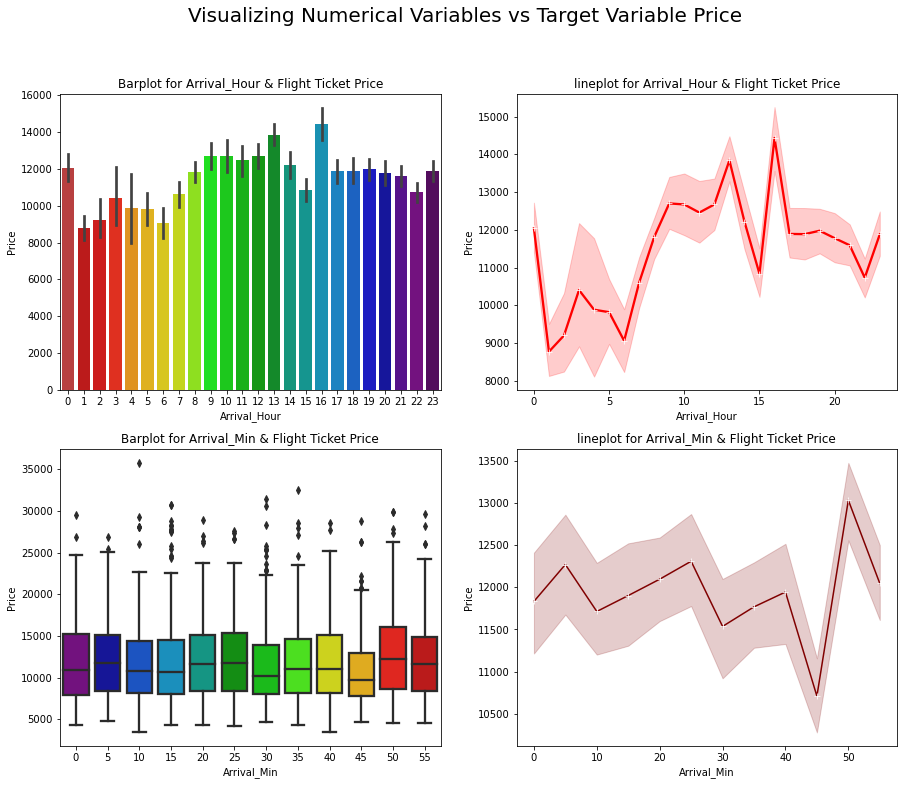

In [36]:
plt.figure(figsize = (15,12))
plt.suptitle("Visualizing Numerical Variables vs Target Variable Price",fontsize=20)

plt.subplot(2,2,1)
plt.title("Barplot for Arrival_Hour & Flight Ticket Price")
sns.barplot(x= df['Arrival_Hour'],y= df['Price'],palette = "nipy_spectral_r",linewidth=2.3)

plt.subplot(2,2,2)
plt.title("lineplot for Arrival_Hour & Flight Ticket Price")
sns.lineplot(x = df['Arrival_Hour'],y= df['Price'],marker="+",color='r',linewidth=2.3)

plt.subplot(2,2,3)
plt.title("Barplot for Arrival_Min & Flight Ticket Price")
sns.boxplot(x='Arrival_Min',y='Price',data=df,palette = "nipy_spectral",linewidth=2.3)

plt.subplot(2,2,4)
plt.title("lineplot for Arrival_Min & Flight Ticket Price")
sns.lineplot(x='Arrival_Min',y='Price',data=df,marker="+",color='maroon')

plt.show()

## Observations:
- Arrival_Hour vs Price: From the bar plot and line plot we can observe that very few flights are arriving in the early morning that is 0 to 6 AM they have very less ticket price. Also, the flights which are arriving in the afternoon and evening have somewhat higher price. So, we can conlude this column has some positive correlation with price.
- Arrival_Min vs Price: There is no significant difference between this feature and price. We can say flight ticket prices are not much dependent on the Arrival_min.

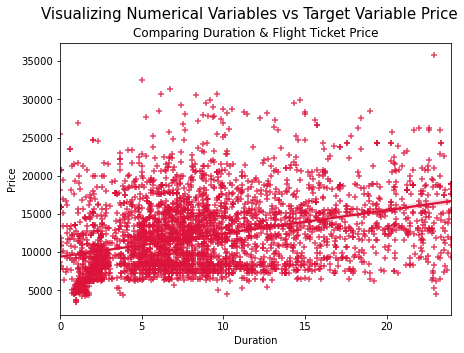

In [37]:
plt.figure(figsize = (7,5))
plt.suptitle("Visualizing Numerical Variables vs Target Variable Price",fontsize=15)

plt.title("Comparing Duration & Flight Ticket Price")
sns.regplot(x= df['Duration'],y= df['Price'],marker="+",color='crimson')
plt.show()

## Observations:
- Duration vs Price: From the reg plot we can observe some positive linear relation between Duration and Price. Flights having 1-12 hours of duration, they have ticket price of around 15000.

Till now we have checked the relation between the independent variables and dependent variable that is our target column "Price". Now let's check the relation between two independent variables and compare each of them with others.

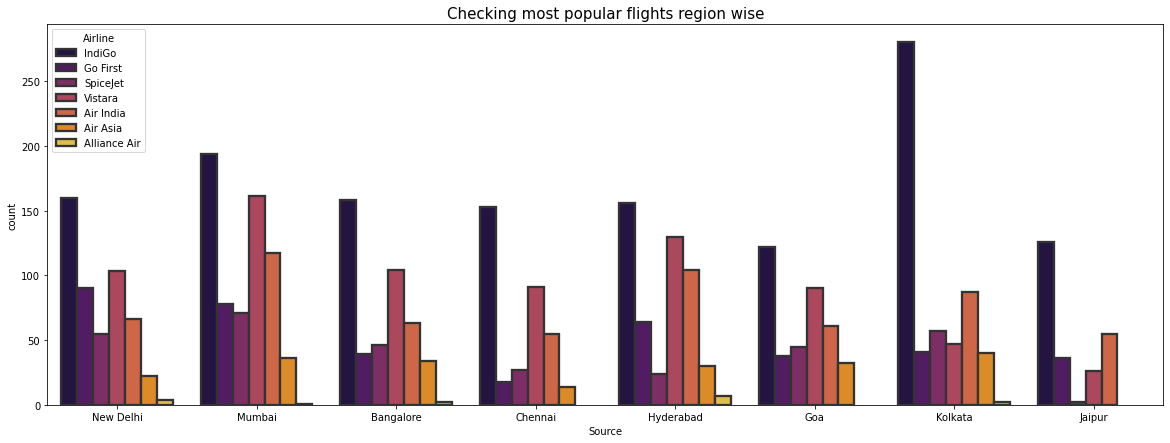

In [38]:
# Lets chcek the most popular flight region wise
plt.figure(figsize=(20,7))
sns.countplot(x = "Source", hue = "Airline", data = df, palette = "inferno",linewidth=2.3, edgecolor=".2")
plt.title("Checking most popular flights region wise",fontsize=15)
plt.show()

## Observations:
- Source vs Airline: The plot showing the region wise count of airlines which tells us that Kolkata source is having very few Alliance Air flights and it has Indigo flights in higher count compared to other sources. Other sources have Air India, Vistara, SpiceJet, Air Asia and Indigo flights with higher count.

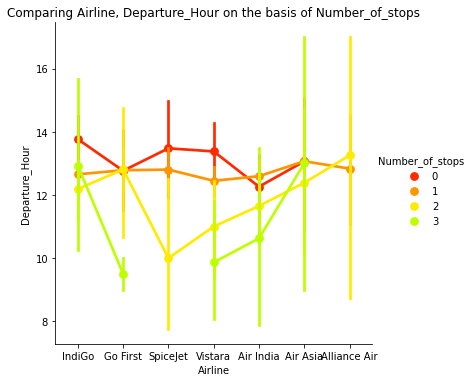

In [39]:
# Lets check the relation between independent variables
sns.factorplot(x= "Airline", y="Departure_Hour",hue="Number_of_stops",palette="prism", data=df)
plt.title("Comparing Airline, Departure_Hour on the basis of Number_of_stops")
plt.show()

## Observations:
- Above plot gives the relation between Airline and Departure hour based on Number of stops. Alliance Air and Air Asia flights are departing in the evening and they have less than 3 stops during the journey.

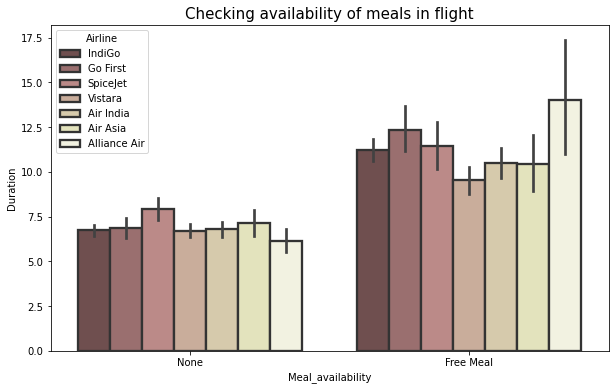

In [40]:
# Lets chcek the most popular flight region wise
plt.figure(figsize=(10,6))
sns.barplot(x = "Meal_availability", y = "Duration",hue="Airline",data = df, palette = "pink",linewidth=2.3, edgecolor=".2")
plt.title("Checking availability of meals in flight",fontsize=15)
plt.show()

## Observations:
- All the airlines provides free meals during the journey having the duration below 15 hours.

## Multivariate Analysis

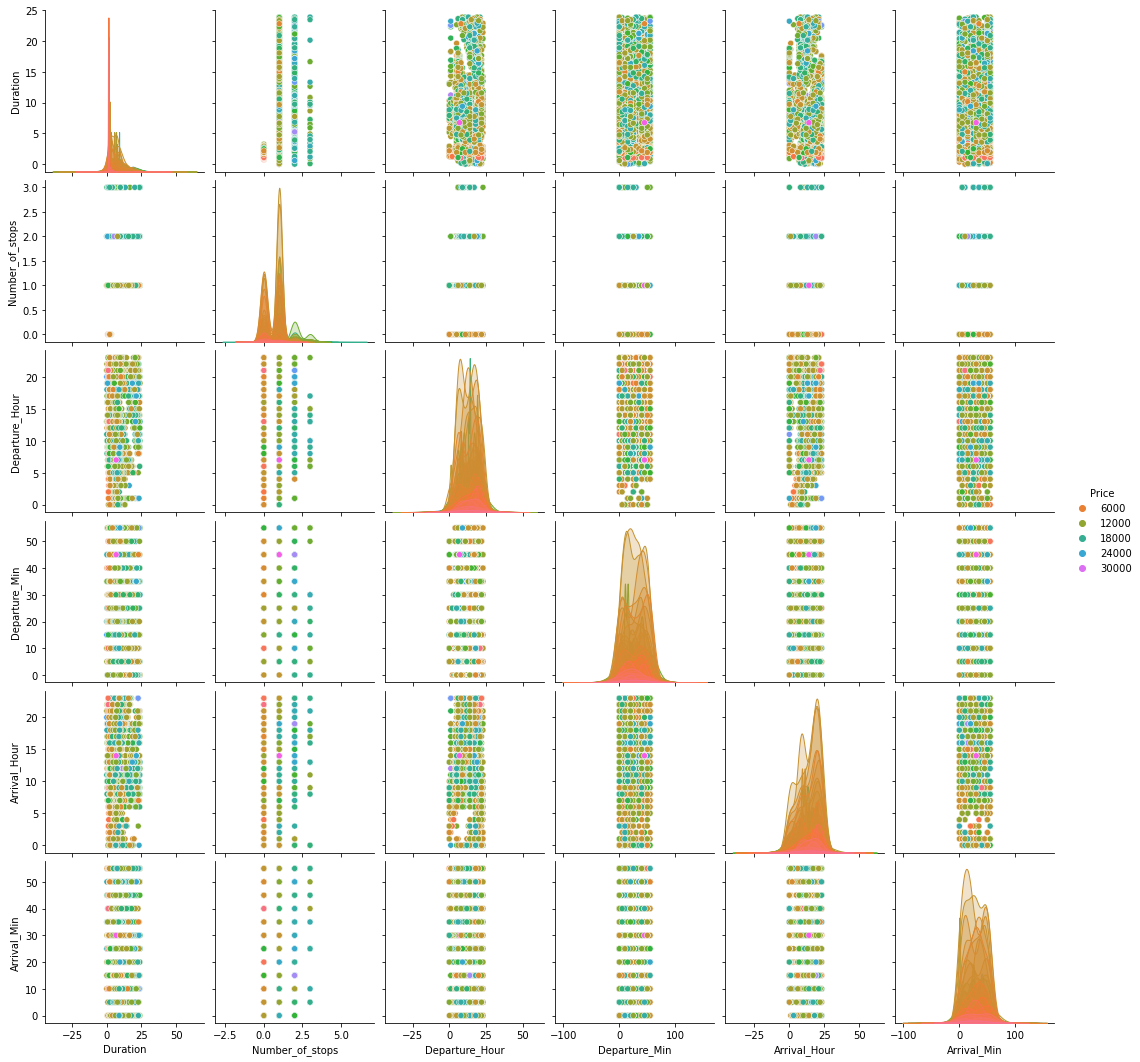

In [41]:
sns.pairplot(df,hue="Price",palette="husl")
plt.show()

- This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "Price". Here we can observe the relation between the features and label.
- Here we can observe the correaltion between the features and on the diagonal we can notice the distribution plot which shows whether the column has skewness or not.

## EDA Conclusion:

After cleaning the data, we have done the following analysis on the data.

#### 1. Do airfares change frequently? Do they move in small increments or in large jumps?

Flight ticket prices change during the morning and evening time of the day. From the distribution plots we came to know that the prices of the flight tickets are going up and down, they are not fixed at a time. Also, from this graph we found prices are increasing in large amounts.

#### 2. Do they tend to go up or down over time?

Some flights are departing in the early morning 1 AM having most expensive ticket prices compared to late morning flights. As the time goes the flight ticket fares increased and midnight flight fares are very less (say after 10 PM). Also from categorical and numerical plots we found that the prices are tending to go up as the time is approaching from morning to evening.

#### 3. What is the best time to buy so that the consumer can save the most by taking the least risk?

From the categorical plots (bar and box) we came to know that early morning and late night flights are cheaper compared to working hours.

#### 4. Does price increase as we get near to departure date?

From the categorical plots we found that the flight ticket prices increases as the person get near to departure time. That is last minute flights are very expensive.

#### 5. Is Indigo cheaper than Jet Airways?

From the bar plot we got to know that both Indigo and Spicejet airways almost having same ticket fares.

#### 6. Are morning flights expensive?

Not all flights are expensive during morning, only few flights departing in the early morning 3 AM are expensive. Apart from this the flight ticket fares are less compared to other timing flight fares.

## Data Pre-processing
## Identifying the outliers

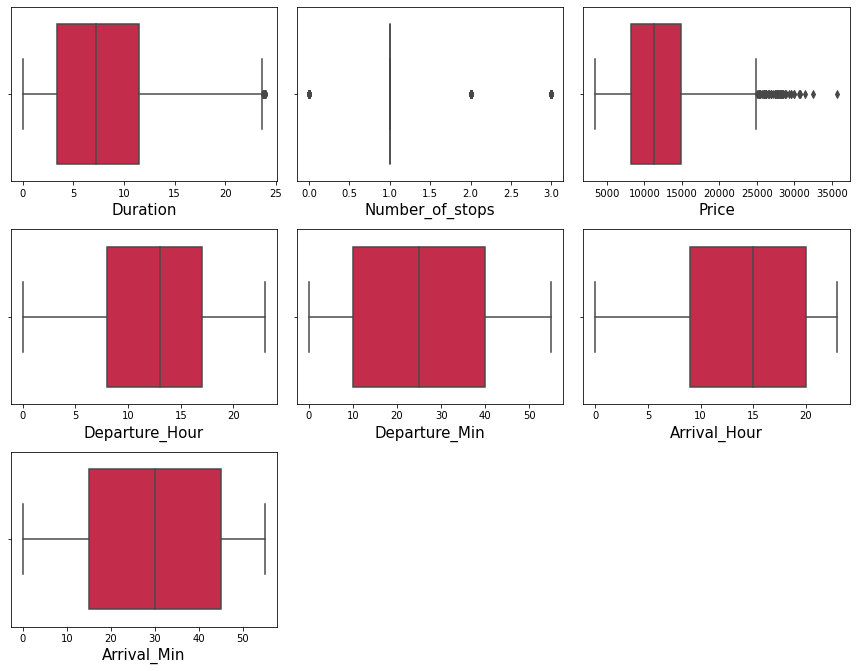

In [41]:
# Identifying the outliers using boxplot

plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=7:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column],color="crimson")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.savefig("boxplot.png")

- The outliers present in "Duration","Number_of_stops" and "Price" columns.
- Since Price is our target column and Number_of_stops is our categorical variable so no need to remove outliers in this columns. Finally there is no need to remove outliers in the dataset.

## Checking for skewness in the data

In [42]:
# Checking the skewness
df.skew()

Duration           0.816515
Number_of_stops    0.337557
Price              0.970754
Departure_Hour    -0.014438
Departure_Min      0.080873
Arrival_Hour      -0.558468
Arrival_Min       -0.101281
dtype: float64

We can find the skewness in Duration column and Price column. Price is our target variable we should not loose any data so, no need remove skewness in this column so, let's remove skewness in Duration column.

## Removing skewness using square root transformation

In [43]:
df["Duration"] = np.sqrt(df["Duration"])

In [44]:
# Again checking the skewness
df.skew()

Duration           0.126224
Number_of_stops    0.337557
Price              0.970754
Departure_Hour    -0.014438
Departure_Min      0.080873
Arrival_Hour      -0.558468
Arrival_Min       -0.101281
dtype: float64

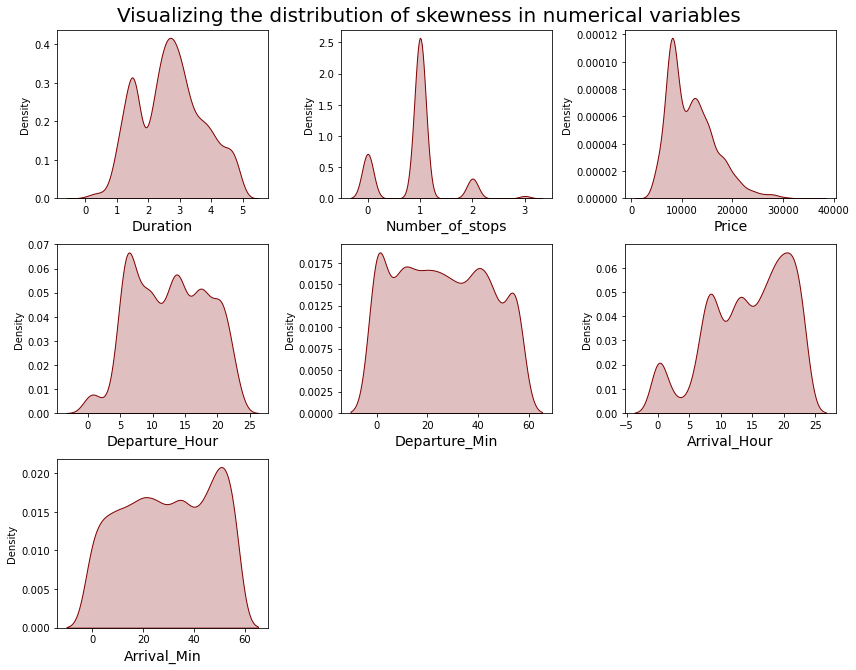

In [45]:
# Checking how the data has been distriubted after removing skewness in the column
plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the distribution of skewness in numerical variables",fontsize=20)
plotnumber=1
for column in numerical_col:
    if plotnumber<=7:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],hist=False, color="maroon", kde_kws={"shade": True})
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()
plt.savefig("skew.png")

## Encoding the categorical columns using Label Encoder Method

In [46]:
# Converting categorical data into numerical using Label Encoder method
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(LE.fit_transform)

In [47]:
# Displaying dataframe after encoding 
df

Airline  Duration  Source  Destination  Meal_availability  \
0           4  1.414214       7            7                  1   
1           4  1.443376       7            7                  1   
2           4  1.443376       7            7                  1   
3           4  1.443376       7            7                  1   
4           4  1.471960       7            7                  1   
5           3  1.471960       7            7                  1   
6           3  1.471960       7            7                  1   
7           4  1.471960       7            7                  1   
8           4  1.471960       7            7                  1   
9           4  1.471960       7            7                  1   
10          4  1.471960       7            7                  1   
11          3  1.500000       7            7                  1   
12          4  1.500000       7            7                  1   
13          3  1.500000       7            7                  1   
14          5  1.500000       7            7                  1   
15          4  1.581139       7            7                  1   
16          3  2.415229       7            7                  1   
17          3  2.581989       7            7                  1   
18          5  2.629956       7            7                  1   
19          3  2.692582       7            7                  1   
20          5  4.102845       7            7                  1   
21          5  4.232808       7            7                  1   
22          6  1.471960       7            7                  0   
23          1  1.471960       7            7                  0   
24          1  1.500000       7            7                  0   
25          6  1.527525       7            7                  0   
26          1  1.527525       7            7                  0   
27          1  1.755942       7            7                  0   
28          1  1.936492       7            7                  0   
29          4  1.554563       7            7                  1   
30          0  1.354006       7            7                  1   
31          0  1.471960       7            7                  1   
32          4  1.443376       7            7                  1   
33          4  1.443376       7            7                  1   
34          5  1.500000       7            7                  1   
35          5  2.415229       7            7                  1   
36          5  3.807887       7            7                  1   
37          5  3.807887       7            7                  1   
38          5  3.947573       7            7                  1   
39          6  1.414214       7            7                  0   
40          6  1.471960       7            7                  0   
41          6  1.471960       7            7                  0   
42          6  1.471960       7            7                  0   
43          6  1.527525       7            7                  0   
44          5  1.554563       7            7                  1   
45          3  1.471960       7            7                  1   
46          3  1.500000       7            7                  1   
47          4  3.055050       7            7                  1   
48          6  1.471960       7            7                  0   
49          6  1.527525       7            7                  0   
50          0  2.533114       7            7                  1   
51          0  2.929733       7            7                  1   
52          0  3.304038       7            7                  1   
53          0  3.617089       7            7                  1   
54          0  3.752777       7            7                  1   
55          5  1.500000       7            7                  1   
56          6  1.500000       7            7                  0   
57          4  1.500000       7            7                  1   
58          4  1.527525       7            7         

Now we have converted the categorical columns into numerical columns using label encoding method

## Correlation between the target variable and independent variables using HEAT map

In [48]:
# Checking the correlation between features and the target
cor = df.corr()
cor

Airline  Duration    Source  Destination  \
Airline            1.000000 -0.022465 -0.019006     0.059198   
Duration          -0.022465  1.000000  0.028571    -0.020640   
Source            -0.019006  0.028571  1.000000    -0.112284   
Destination        0.059198 -0.020640 -0.112284     1.000000   
Meal_availability  0.040198 -0.269046 -0.010961     0.020600   
Number_of_stops   -0.068791  0.521651 -0.024890    -0.092083   
Price             -0.100390  0.391256  0.103330    -0.150959   
Departure_Hour     0.001531  0.019529  0.015905     0.004347   
Departure_Min      0.020532 -0.013038 -0.031408     0.047332   
Arrival_Hour      -0.004654 -0.047437  0.010465     0.007048   
Arrival_Min       -0.025995  0.049702 -0.017315    -0.036068   

                   Meal_availability  Number_of_stops     Price  \
Airline                     0.040198        -0.068791 -0.100390   
Duration                   -0.269046         0.521651  0.391256   
Source                     -0.010961        -0.024890  0.103330   
Destination                 0.020600        -0.092083 -0.150959   
Meal_availability           1.000000        -0.328018 -0.473629   
Number_of_stops            -0.328018         1.000000  0.547679   
Price                      -0.473629         0.547679  1.000000   
Departure_Hour             -0.071847        -0.068567 -0.118354   
Departure_Min               0.026866        -0.052510 -0.033346   
Arrival_Hour               -0.002968         0.032696  0.016271   
Arrival_Min                -0.083025         0.054437  0.009560   

                   Departure_Hour  Departure_Min  Arrival_Hour  Arrival_Min  
Airline                  0.001531       0.020532     -0.004654    -0.025995  
Duration                 0.019529      -0.013038     -0.047437     0.049702  
Source                   0.015905      -0.031408      0.010465    -0.017315  
Destination              0.004347       0.047332      0.007048    -0.036068  
Meal_availability       -0.071847       0.026866     -0.002968    -0.083025  
Number_of_stops         -0.068567      -0.052510      0.032696     0.054437  
Price                   -0.118354      -0.033346      0.016271     0.009560  
Departure_Hour           1.000000      -0.022959     -0.001208     0.014899  
Departure_Min           -0.022959       1.000000      0.016777     0.016494  
Arrival_Hour            -0.001208       0.016777      1.000000     0.032550  
Arrival_Min              0.014899       0.016494      0.032550     1.000000

This gives the correlation between the dependent and independent variables. We can visualize this by plotting heat map.

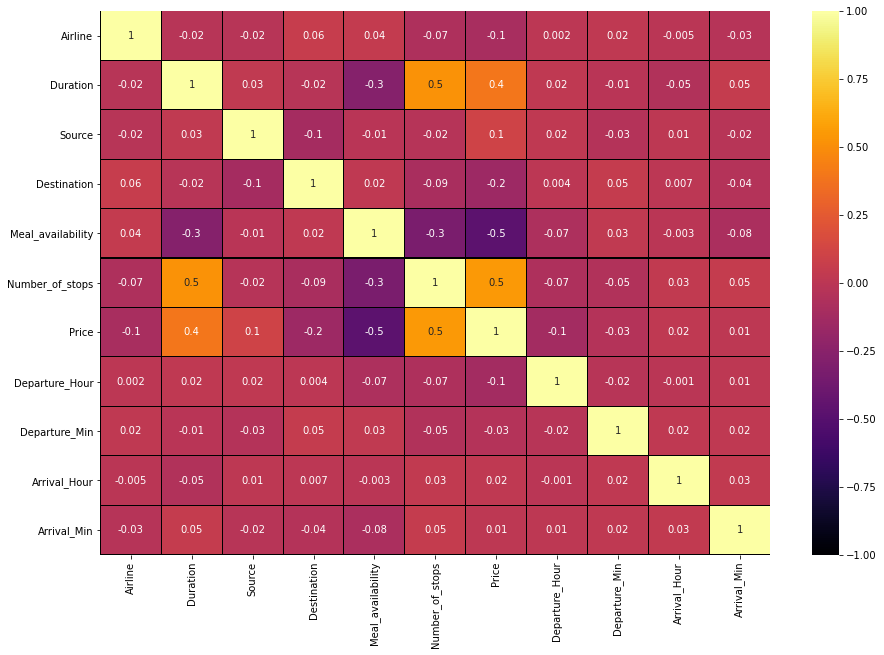

In [49]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(15,10))    
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,annot_kws={'size':10},cmap="inferno")
plt.yticks(rotation=0)
plt.savefig("heatmap.png");

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

- This heat map contains both positive and negative correlation.
- The features Number_of_stops, Duration Arrival_Hour and Airline are highly positively correlated with the target column compared to other features.
- The other features have very less correlation with the target column.
- From the map we can also observe there is no multicollinearity issue exists.

In [50]:
cor['Price'].sort_values(ascending=False)

Price                1.000000
Number_of_stops      0.547679
Duration             0.391256
Source               0.103330
Arrival_Hour         0.016271
Arrival_Min          0.009560
Departure_Min       -0.033346
Airline             -0.100390
Departure_Hour      -0.118354
Destination         -0.150959
Meal_availability   -0.473629
Name: Price, dtype: float64

Here we can notice the positive and negative correlation between features and label in the descending order.

## Visualizing the correlation between label and features using bar plot

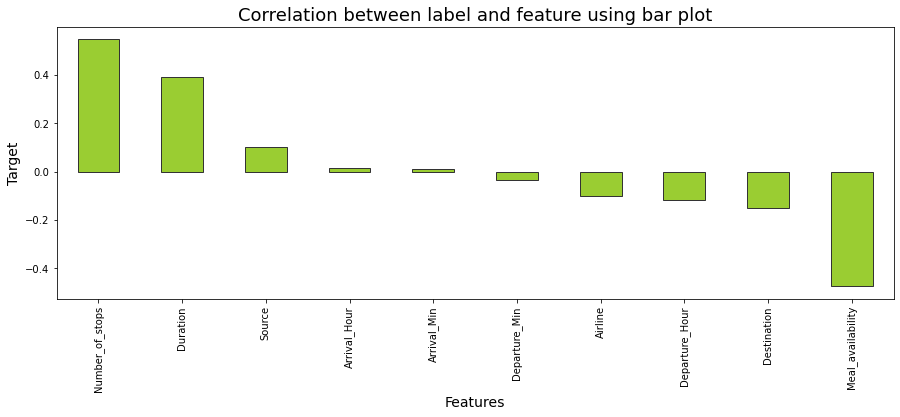

<Figure size 432x288 with 0 Axes>

In [51]:
plt.figure(figsize=(15,5))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='yellowgreen',edgecolor=".2")
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and feature using bar plot',fontsize=18)
plt.show()
plt.savefig("corr.png")

From the bar plot we can clearly observe the positive and negative correlation between the label and features. Here the column "Arrival_Min" has less correlation with the label compared to other features, we can drop this column if necessary but for now let's keep it as it is.

## Separating the feature and label into x and y

In [53]:
x = df.drop("Price", axis=1)
y = df["Price"]

We have separated both dependent and independent variables.

In [54]:
# Dimension of x and y
x.shape, y.shape

((3664, 10), (3664,))

After data cleaning and preprocessing we are left with 10 columns which we are using to train our machine learning model for prediciting the ticket price of the flights.

## Feature Scaling Using StandardScaler

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

Airline  Duration    Source  Destination  Meal_availability  \
0  0.188847 -1.246951  1.376938     1.005376           0.777305   
1  0.188847 -1.218700  1.376938     1.005376           0.777305   
2  0.188847 -1.218700  1.376938     1.005376           0.777305   
3  0.188847 -1.218700  1.376938     1.005376           0.777305   
4  0.188847 -1.191009  1.376938     1.005376           0.777305   

   Number_of_stops  Departure_Hour  Departure_Min  Arrival_Hour  Arrival_Min  
0        -1.617817       -0.299191       1.627301     -0.202434     1.471970  
1        -1.617817       -0.475747       1.065338     -0.358224     1.183512  
2        -1.617817        0.760145      -1.463498      0.732308    -1.412610  
3        -1.617817        1.819481       0.503374     -2.071917     0.606596  
4        -1.617817       -1.888196      -1.463498     -1.604546    -1.124152

We have scaled the data using StandardScaler method to overcome with the issue of data biasness and displayed the data of independent variables after scaling.

## Building Machine Learning Models
## Finding the Best Random State and Accuracy

In [56]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.6761015134244459  on Random_state  43


With the help of random state selection process we have found our random state to be 43 amongst 1-1000 with best accuracy as 67.61% using Random Forest Regressor.

## Feature Importance

In [57]:
# Lets chkeck the feature importance using Random Forest Regressor

RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(RFR.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

Importance
Features                     
Meal_availability       0.238
Number_of_stops         0.190
Duration                0.106
Departure_Hour          0.094
Destination             0.077
Source                  0.075
Departure_Min           0.065
Arrival_Hour            0.059
Arrival_Min             0.058
Airline                 0.038

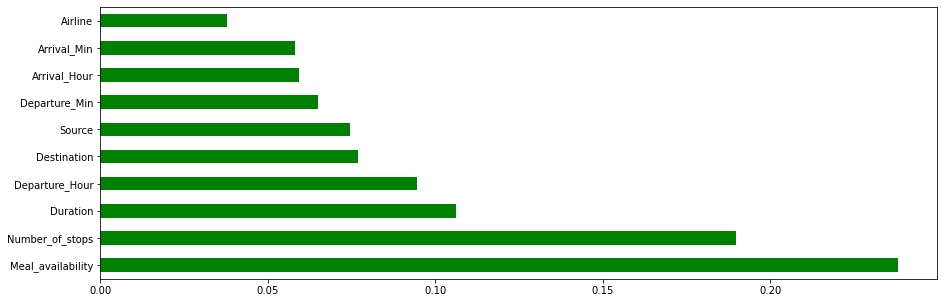

In [58]:
plt.figure(figsize=(15,5))
importances=pd.Series(RFR.feature_importances_,index=x.columns)
importances.nlargest(30).plot(kind='barh',color="g")
plt.show()

Here with the help of RandomForestRegressor we are able to list down the importance given to a column as per it's involvement in predicting our label. Here the column "Number_of_stops", "Meal_availability" and "Duration" contributing more for prediction which means these features are important for the predictions.

## Creating new train test split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=10)

I am taking 30 percent of the complete dataset for training purpose and the remaining 70 percent will be used to train the machine learning models using the random state.

## ML Regression Algorithms with Evaluation Metrics

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

## Decision Tree Regressor

The R2_Score is: 17.839015078037168
The Mean Absolute Error is: 2552.200909090909
The Mean Squared Error is: 17311077.604545455
The Root Mean Squared Error is: 4160.658313842348


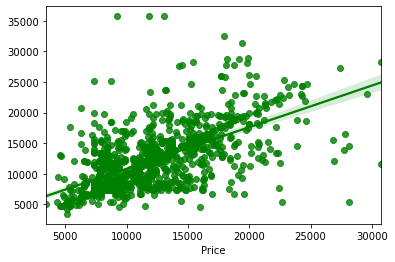

In [61]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
R2_score = r2_score(y_test,predDTR)*100    
print('The R2_Score is:',R2_score) 
# Evaluation Metrics
print('The Mean Absolute Error is:',metrics.mean_absolute_error(y_test, predDTR))    
print('The Mean Squared Error is:',metrics.mean_squared_error(y_test, predDTR))     
print("The Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

# Visualizing the predicted values
sns.regplot(y_test,predDTR,color="g")
plt.show()

- Created Decision Tree Regressor model and checked for its evaluation metrics. The model is giving R2 score as 17.83%.
- From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that the model has given.

## Random Forest Regressor

The R2_Score is: 62.98385580267096
The Mean Absolute Error is: 1992.6963695946479
The Mean Squared Error is: 7799192.590371631
The Root Mean Squared Error is: 2792.7034555017885


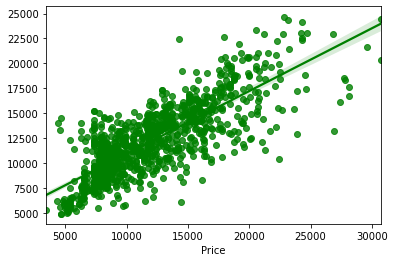

In [62]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
R2_score = r2_score(y_test,predRFR)*100      # R squared score
print('The R2_Score is:',R2_score) 
# Evaluation Metrics
print('The Mean Absolute Error is:',metrics.mean_absolute_error(y_test, predRFR))    
print('The Mean Squared Error is:',metrics.mean_squared_error(y_test, predRFR))     
print("The Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test, predRFR))) 

# Visualizing the predicteed values
sns.regplot(y_test,predRFR,color="g")
plt.show()

- Created Random Forest Regressor model and checked for it's evaluation metrics. The model is giving R2 score as 62.98%.
- From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that our model has given.

## Extra Trees Regressor

The R2_Score is: 68.12820438025018
The Mean Absolute Error is: 1781.7005454545456
The Mean Squared Error is: 6715293.492327818
The Root Mean Squared Error is: 2591.388332984429


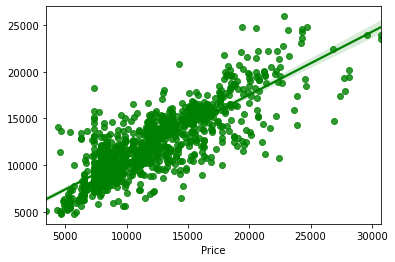

In [63]:
# Checking R2 score for Extra Trees Regressor
XT=ExtraTreesRegressor()
XT.fit(x_train,y_train)

# prediction
predXT=XT.predict(x_test)
R2_score = r2_score(y_test,predXT)*100      # R squared score
print('The R2_Score is:',R2_score) 
# Evaluation Metrics
print('The Mean Absolute Error is:',metrics.mean_absolute_error(y_test, predXT))    
print('The Mean Squared Error is:',metrics.mean_squared_error(y_test, predXT))     
print("The Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test, predXT))) 

# Visualizing the predicteed values
sns.regplot(y_test,predXT,color="g")
plt.show()

- Created Extra Trees Regressor model and checked for its evaluation metrics. The model is giving R2 score as 68.12%.
- From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that our model has given.

## GradientBoosting Regressor

The R2_Score is: 53.53794965375123
The Mean Absolute Error is: 2331.0913602490086
The Mean Squared Error is: 9789417.202996641
The Root Mean Squared Error is: 3128.8044366813087


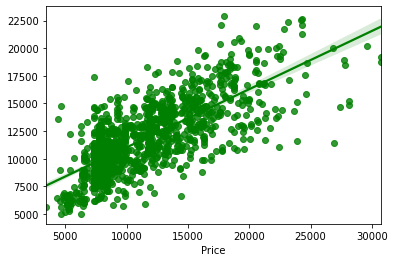

In [64]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
R2_score = r2_score(y_test,predGB)*100      # R squared score
print('The R2_Score is:',R2_score) 
# Evaluation Metrics
print('The Mean Absolute Error is:',metrics.mean_absolute_error(y_test, predGB))    
print('The Mean Squared Error is:',metrics.mean_squared_error(y_test, predGB))     
print("The Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test, predGB))) 

# Visualizing the predicteed values
sns.regplot(y_test,predGB,color="g")
plt.show()

- Created GradientBoosting Regressor model and checked for its evaluation metrics. The model is giving R2 score as 53.53%.
- From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and the dots are the predictions that our model has given.

## Extreme Gradient Boosting Regressor (XGB)

R2_Score: 59.983116607362405
Mean Absolute Error: 2069.9521226917614
Mean Squared Error: 8431439.503311228
Root Mean Squared Error: 2903.6941132480238


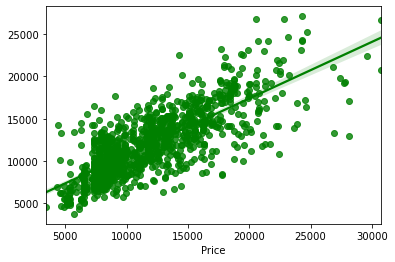

In [65]:
# Checking R2 score for XGB Regressor
from xgboost import XGBRegressor as xgb
XGB=xgb(verbosity=0)
XGB.fit(x_train,y_train)

# prediction
predXGB=XGB.predict(x_test)
R2_score = r2_score(y_test,predXGB)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predXGB))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predXGB))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predXGB))) 

# Visualizing the predicteed values
sns.regplot(y_test,predXGB,color="g")
plt.show()

- Created XGB Regressor model and checked for its evaluation metrics. The model is giving R2 score as 59.98%.
- From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and the dots are the predictions that our model has given.

## Bagging Regressor

The R2_Score is: 58.95089922195543
The Mean Absolute Error is: 2078.0627363636368
The Mean Squared Error is: 8648924.667109022
The Root Mean Squared Error is: 2940.905416212671


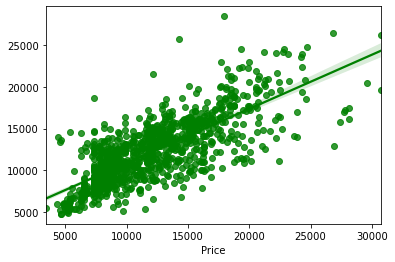

In [66]:
# Checking R2 score for BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
R2_score = r2_score(y_test,predBR)*100      # R squared score
print('The R2_Score is:',R2_score) 
# Evaluation Metrics
print('The Mean Absolute Error is:',metrics.mean_absolute_error(y_test, predBR))    
print('The Mean Squared Error is:',metrics.mean_squared_error(y_test, predBR))     
print("The Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test, predBR))) 

# Visualizing the predicteed values
sns.regplot(y_test,predBR,color="g")
plt.show()

- Created Bagging Regressor model and checked for its evaluation metrics. The model is giving R2 score as 58.93%.
- From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and the dots are the predictions that our model has given.

### Model Selection
#### From the above created models, Extra Trees Regressor algorithm has high R2 score and less RMSE value. So, we can conclude that "Extra Trees Regressor" as the best fitting model. Let's try to increase our model score by tuning the best model using different types of hyper parameters.

## Hyper Parameter Tuning

In [67]:
# Let's Use the GridSearchCV to find the best paarameters in XGBRegressor
from sklearn.model_selection import GridSearchCV

# Extra Trees Regressor
parameter = {'n_estimators':[10,100,1000],
             'criterion':['squared_error','mse','absolute_error','mae'],
             'min_samples_split': [1,2,3,4],
             'max_features':['auto','sqrt','log2'],
             'n_jobs':[-2,-1,1,2]}

I Have used 5 Extra Trees Regressor parameters to be saved under the variable "parameter" that will be used in GridSearchCV for finding the best output.

In [68]:
GCV=GridSearchCV(ExtraTreesRegressor(),parameter,cv=5)

In [69]:
# Running GridSearchCV
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [10, 100, 1000],
                         'n_jobs': [-2, -1, 1, 2]})

In [70]:
# Finding best parameters
GCV.best_params_

{'criterion': 'mae',
 'max_features': 'auto',
 'min_samples_split': 3,
 'n_estimators': 1000,
 'n_jobs': -2}

This gives us the list of best parameters which will be used further in our final model creation.

The R2_Score is: 68.83808936441038
The Mean absolute error is: 1738.0895863636363
The Mean squared error is: 6565722.816382651
The Root Mean Squared error is: 2562.3666436290205


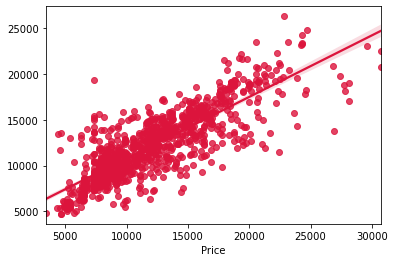

In [73]:
# Creating final model
Flight_price_model = ExtraTreesRegressor(criterion='mae',max_features='auto',min_samples_split=3,n_estimators=1000,n_jobs=-2)

# Prediction
Flight_price_model.fit(x_train, y_train)
pred = Flight_price_model.predict(x_test)
print('The R2_Score is:',r2_score(y_test,pred)*100)

# Metric Evaluation
print('The Mean absolute error is:',metrics.mean_absolute_error(y_test, pred))
print('The Mean squared error is:',metrics.mean_squared_error(y_test, pred))
print('The Root Mean Squared error is:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

# Visualizing the predicted values
sns.regplot(y_test,pred,color="crimson")
plt.show()

- We have successfully incorporated the hyper parameter tuning using best parameters of Extra Trees Regressor and the R2 score of the model has been increased after hyperparameter tuning and received the R2 score as 68.83% which is very good.
- From the graph we can observe how our final model is mapping. In the graph we can observe the best fit line which is our actual dataset and the dots are the predictions that our best final model has given.

## Saving the Final model

In [74]:
# Saving the model using joblib library 
import joblib
joblib.dump(Flight_price_model,"Flight_Ticket_Price_Prediction.pkl")

['Flight_Ticket_Price_Prediction.pkl']

I am using the joblib option to save the final regression model in the form of .pkl.

## Loading the saved model and predicting Flight Ticket Price

In [75]:
# Loading the saved model
Model=joblib.load("Flight_Ticket_Price_Prediction.pkl")

#Prediction
prediction = Model.predict(x_test)
prediction

array([12382.217 ,  8867.98  ,  8616.242 , ..., 15992.9855,  9449.1345,
        7106.0405])

These are the predicted price of the flight tickets.

## Creating DataFrame for the predicted values

In [76]:
Predicted_Flight_Ticket_Price = pd.DataFrame([Model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])
Predicted_Flight_Ticket_Price

0        1         2           3           4           5     \
Predicted  12382.217  8867.98  8616.242  21552.2385  13608.0615  11614.6845   
Actual      9867.000  8159.00  8773.000  17965.0000  13354.0000  12094.0000   

                 6          7           8          9     ...      1090  \
Predicted  11169.9255  11498.652   9639.0095  8345.3175  ...  6278.262   
Actual     16504.0000  12015.000  12409.0000  7513.0000  ...  6468.000   

                1091      1092      1093       1094       1095     1096  \
Predicted  11279.314  8494.251   8459.71  7308.9815  9552.5935  18738.0   
Actual      9360.000  6757.000  10104.00  9198.0000  7732.0000  18738.0   

                 1097       1098        1099  
Predicted  15992.9855  9449.1345   7106.0405  
Actual     16080.0000  8358.0000  14451.0000  

[2 rows x 1100 columns]

Using regression model, we have got the predicted price of the flight tickets. From the above output we can observe that predicted values are almost near to the actual values.

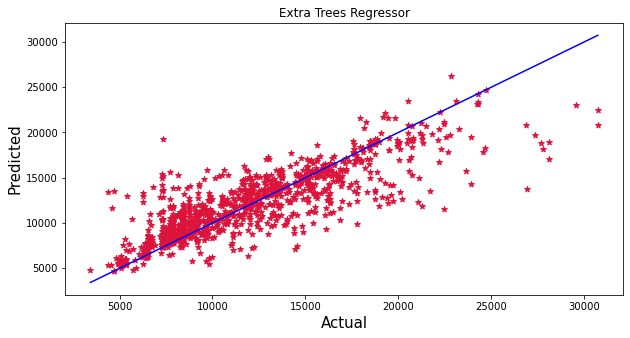

In [77]:
# Visualizing actual and predicted values
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson',marker="*")
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("Extra Trees Regressor")
plt.show()

The graph shows how our final model is mapping. The plot gives the linear relation between predicted and actual price of the flight tickets. The blue line is the best fitting line which gives the actual values/data and red dots gives the predicted values/data.

In [78]:
# Saving the predicted car price values in csv file
Predicted_Flight_Ticket_Price.to_csv("Predicted_Flight_Ticket_Price.csv",index=False)

## Conclusion
#### Key Findings and Conclusion of the Study:
The case study aims to give an idea of applying Machine Learning algorithms to predict the price of the flight tickets. After the completion of this project, we got an insight of how to collect data, pre-processing the data, analyze the data, cleaning the data and building a model.
First we collected the flights data from website www.yatra.com and it was done by using Web scraping. The framework used for web scraping was Selenium, which has an advantage of automating our process of collecting data. We collected almost 3664 of data which contained the ticket price of the flights and other related features. Then, the scrapped data was saved in a excel file so that we can use further and analyse the data.
Then we loaded the dataset and have done data cleaning, EDA process and pre-processing techniques like checking outliers, skewness, correlation, scaling data etc and got better insights from data visualization.
From the visualizations we have done some analysis which I have mentioned already in the EDA conclusion part. That is:
Data Analysis
#### 1. Do airfares change frequently? Do they move in small increments or in large jumps?

Flight ticket prices change during the morning and evening time of the day. From the distribution plots we came to know that the prices of the flight tickets are going up and down, they are not fixed at a time. Also, from this graph we found prices are increasing in large amounts.
#### 2. Do they tend to go up or down over time?

Some flights are departing in the early morning 1 AM having most expensive ticket prices compared to late morning flights. As the time goes the flight ticket fares increased and midnight flight fares are very less (say after 10 PM). Also from categorical and numerical plots we found that the prices are tending to go up as the time is approaching from morning to evening.
#### 3. What is the best time to buy so that the consumer can save the most by taking the least risk?

From the categorical plots (bar and box) we came to know that early morning and late night flights are cheaper compared to working hours.
#### 4. Does price increase as we get near to departure date?

From the categorical plots we found that the flight ticket prices increases as the person get near to departure time. That is last minute flights are very expensive.
#### 5. Is Indigo cheaper than Jet Airways?

From the bar plot we got to know that both Indigo and Spicejet airways almost having same ticket fares.
#### 6. Are morning flights expensive?

- Not all flights are expensive during morning, only few flights departing in the early morning 1 AM are expensive. Apart from this the flight ticket fares are less compared to other timing flight fares.
- After separating our train and test data, we started running different machine learning regression algorithms to find out the best performing model on the basis of different metrics like R2 Score, Mean Absolute Error, Mean Squared Error, Root Mean Squared Error. We tried many algorithms like Decision Tree Regressor, Random Forest Regressor, Extra Trees Regressor, GradientBoosting Regressor, Extreme Gradient Boosting Regressor (XGBoost), Bagging Regressor.
- We got Extra Trees Regressor as the best model among all the models as it was giving high R2 score and the low evaluation metrics compared to other models. On this basis we performed the Hyperparameter tuning to finding out the best parameter and improving the scores. The R2 score increased after tuning. So we concluded that Extra Trees Regressor as the best algorithm as it was giving high R2 score after tuning.
- After that we saved the model in a pickle with a file name in order to use whenever we require. Then we loaded the saved file and predicted the values.
- Overall, we can conclude that Extra Trees Regressor is the best working algorithm model we obtained. We can improve the data and R2 score by adding some more features to the dataset.